In [158]:
import numpy as np
import pandas as pd

In [159]:
df = pd.read_csv("./datas/ckd_dataset_no2.csv")
df

,Patient_ID,Age,Gender,Serum_Creatinine,Blood_Pressure,Diabetes,Days_In_Hospital,Received_Treatment,City,Deaths
0,1,57,Female,0.7,134,0,9,0,Pune,1
1,2,79,Female,0.7,143,0,19,1,Mumbai,1
2,3,77,Male,0.9,133,0,1,0,Pune,1
3,4,67,Female,1.7,117,0,10,0,Kolkata,1
4,5,90,Male,0.9,149,1,7,0,Ahmedabad,1
...,...,...,...,...,...,...,...,...,...,...
967,968,35,Female,2.5,93,0,19,0,Ahmedabad,1
968,969,82,Male,2.2,164,1,10,0,Delhi,1
969,970,58,Male,2.9,94,1,13,0,Pune,1
970,971,36,Female,1.5,89,0,1,0,Delhi,1


In [160]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          972 non-null    int64  
 1   Age                 972 non-null    int64  
 2   Gender              972 non-null    object 
 3   Serum_Creatinine    972 non-null    float64
 4   Blood_Pressure      972 non-null    int64  
 5   Diabetes            972 non-null    int64  
 6   Days_In_Hospital    972 non-null    int64  
 7   Received_Treatment  972 non-null    int64  
 8   City                972 non-null    object 
 9   Deaths              972 non-null    int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 76.1+ KB


In [161]:
df.describe()

,Patient_ID,Age,Serum_Creatinine,Blood_Pressure,Diabetes,Days_In_Hospital,Received_Treatment,Deaths
count,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000,972.000000
mean,486.500000,54.263374,1.754527,130.396091,0.336420,10.621399,0.295267,0.842593
std,280.736531,21.146017,0.723128,29.257135,0.472728,5.674366,0.456398,0.364372
min,1.000000,18.000000,0.500000,80.000000,0.000000,1.000000,0.000000,0.000000
25%,243.750000,35.000000,1.100000,106.000000,0.000000,6.000000,0.000000,1.000000
50%,486.500000,55.500000,1.700000,130.000000,0.000000,10.000000,0.000000,1.000000
75%,729.250000,72.000000,2.400000,156.000000,1.000000,16.000000,1.000000,1.000000
max,972.000000,90.000000,3.000000,180.000000,1.000000,20.000000,1.000000,1.000000


In [162]:
# Patient_ID 삭제
df = df.drop('Patient_ID',axis=1)
df

,Age,Gender,Serum_Creatinine,Blood_Pressure,Diabetes,Days_In_Hospital,Received_Treatment,City,Deaths
0,57,Female,0.7,134,0,9,0,Pune,1
1,79,Female,0.7,143,0,19,1,Mumbai,1
2,77,Male,0.9,133,0,1,0,Pune,1
3,67,Female,1.7,117,0,10,0,Kolkata,1
4,90,Male,0.9,149,1,7,0,Ahmedabad,1
...,...,...,...,...,...,...,...,...,...
967,35,Female,2.5,93,0,19,0,Ahmedabad,1
968,82,Male,2.2,164,1,10,0,Delhi,1
969,58,Male,2.9,94,1,13,0,Pune,1
970,36,Female,1.5,89,0,1,0,Delhi,1


In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
# 성별
df["Gender"].value_counts()

Gender
Male      490
Female    482
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_1732\695713143.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette="rocket", legend=False)


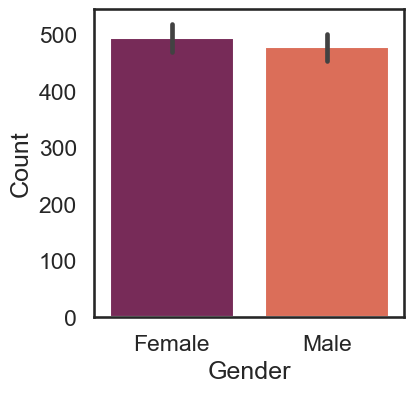

In [165]:
sns.set_theme(style="white", context = "talk")

plt.figure(figsize=(4,4))

x = df["Gender"].values
y = df["Gender"].index
sns.barplot(x=x, y=y, palette="rocket", legend=False)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [166]:
# 당뇨환자 비율
df["Diabetes"].value_counts()

Diabetes
0    645
1    327
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x24bac67d7f0>,
 [Text(-1.0014576815659713, -0.5653162937971186, 'Normal'),
  Text(0.9579160432370157, 0.540737324501592, 'Diabetes')],
 [Text(-0.5660412982764185, -0.31952660084184953, '66.4%'),
  Text(0.5224996599474631, 0.2949476315463228, '33.6%')])

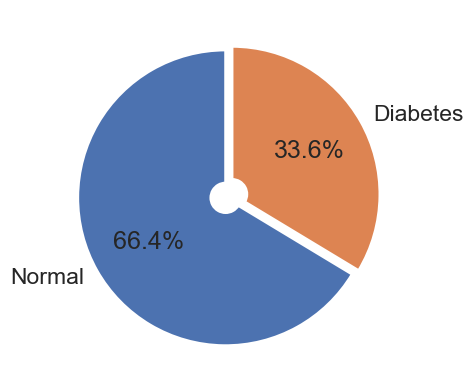

In [167]:
label = ["Normal","Diabetes"]
value = df["Diabetes"].value_counts().values
explode = [0.05,0]
wedgeprops = {'width':0.9, 'edgecolor':'w', 'linewidth':2}
plt.pie(value, labels=label, autopct='%.1f%%', startangle = 90, counterclock=True, explode=explode, wedgeprops=wedgeprops)

In [168]:
# 사망률
df["Deaths"].value_counts()

Deaths
1    819
0    153
Name: count, dtype: int64

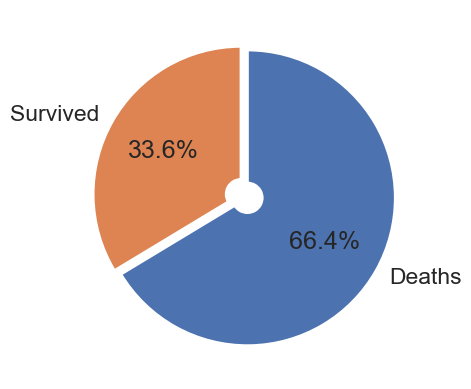

In [169]:
label = ["Deaths","Survived"]
value = df["Diabetes"].value_counts().values
explode = [0.05,0]
wedgeprops = {'width':0.9, 'edgecolor':'w', 'linewidth':2}
plt.pie(value, labels=label, autopct='%.1f%%', startangle = 90, counterclock=False, explode=explode, wedgeprops=wedgeprops)
plt.show()

In [170]:
# 데이터간 상관도
c_df = df.drop(["Gender","City"],axis=1)
c_df.corr()

,Age,Serum_Creatinine,Blood_Pressure,Diabetes,Days_In_Hospital,Received_Treatment,Deaths
Age,1.000000,-0.019535,0.087098,0.022447,-0.041224,-0.037625,0.051366
Serum_Creatinine,-0.019535,1.000000,-0.007121,-0.024494,-0.009596,-0.023245,0.016973
Blood_Pressure,0.087098,-0.007121,1.000000,0.032948,-0.024896,0.038974,-0.003999
Diabetes,0.022447,-0.024494,0.032948,1.000000,0.024112,-0.007411,-0.009135
Days_In_Hospital,-0.041224,-0.009596,-0.024896,0.024112,1.000000,0.061900,0.035900
Received_Treatment,-0.037625,-0.023245,0.038974,-0.007411,0.061900,1.000000,0.025861
Deaths,0.051366,0.016973,-0.003999,-0.009135,0.035900,0.025861,1.000000


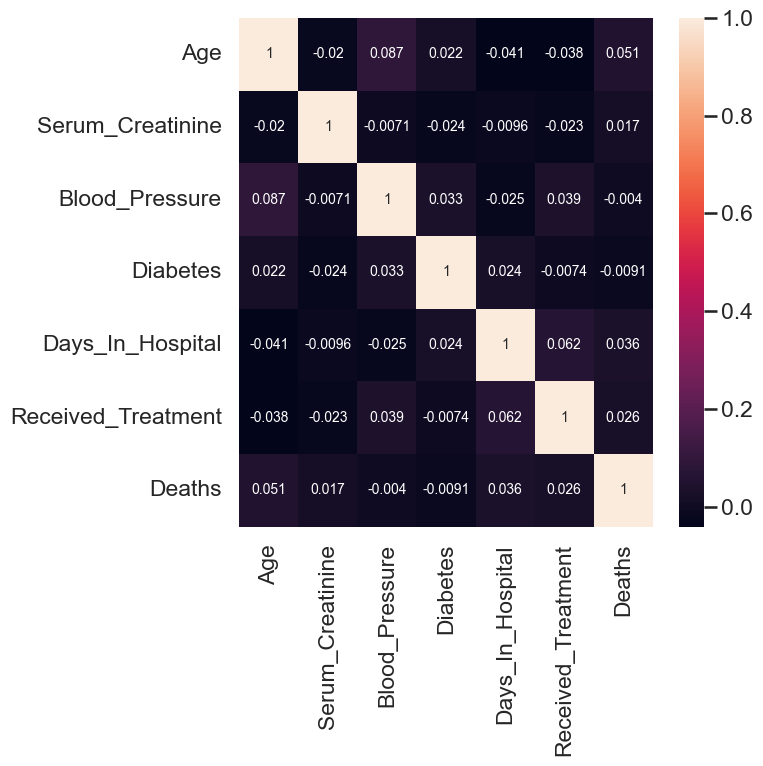

In [171]:
corr = c_df.corr()
show_cols = c_df.columns
plt.figure(figsize=(8,8))
sns.heatmap(corr.values, annot=True, yticklabels=show_cols, xticklabels=show_cols, annot_kws={'size':10})
plt.tight_layout()
plt.show()

### 당뇨환자 데이터 추출

In [172]:
dm_df = df[df["Diabetes"]==1]
dm_df.groupby("Gender").value_counts()

Gender  Age  Serum_Creatinine  Blood_Pressure  Diabetes  Days_In_Hospital  Received_Treatment  City       Deaths
Female  18   0.7               100             1         18                1                   Bengaluru  1         1
             1.9               116             1         20                0                   Pune       0         1
             2.8               129             1         4                 0                   Chennai    0         1
        19   2.4               132             1         16                1                   Pune       1         1
             2.5               144             1         9                 1                   Kolkata    1         1
                                                                                                                   ..
Male    90   0.9               149             1         7                 0                   Ahmedabad  1         1
             1.1               99              1         15  

In [173]:
len(dm_df)

327

In [174]:
# 당뇨환자들의 평균 입원일 평균
dm_df["Days_In_Hospital"].mean()

10.813455657492355

In [195]:
dm_df["Days_In_Hospital"]>dm_df["Days_In_Hospital"].mean()

4      False
5      False
10     False
11     False
18      True
       ...  
954    False
966     True
968    False
969     True
971    False
Name: Days_In_Hospital, Length: 327, dtype: bool

In [178]:
df[dm_df["Days_In_Hospital"].max]

20

<Axes: >

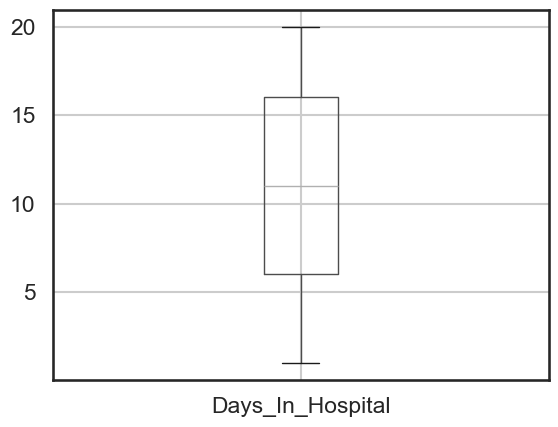

In [179]:
# 입원 환자 분포 
dm_df.boxplot(column=["Days_In_Hospital"])

In [180]:
# 치료받은 환자들의 비율
dm_df["Received_Treatment"].value_counts()

Received_Treatment
0    232
1     95
Name: count, dtype: int64

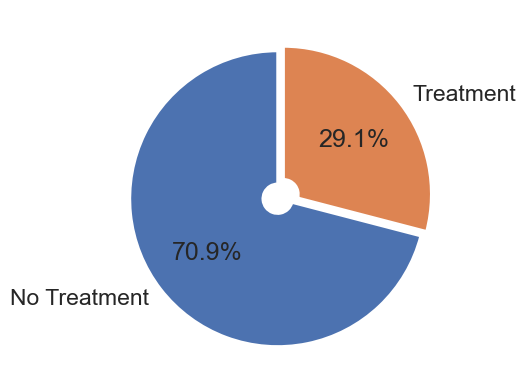

In [181]:
label = ["No Treatment","Treatment"]
value = dm_df["Received_Treatment"].value_counts().values
explode = [0.05,0]
wedgeprops = {'width':0.9, 'edgecolor':'w', 'linewidth':2}
plt.pie(value, labels=label, autopct='%.1f%%', startangle = 90, counterclock=True, explode=explode, wedgeprops=wedgeprops)
plt.show()

In [207]:
dm_df["Serum_Creatinine"]

4      0.9
5      2.6
10     2.5
11     0.9
18     2.2
      ... 
954    2.7
966    3.0
968    2.2
969    2.9
971    1.9
Name: Serum_Creatinine, Length: 327, dtype: float64

### 당뇨환자 중 비정상 크레아티닌 수치 환자 데이터 추출

In [216]:
# Serum_Creatinine normal range : 0.6 ~ 1.2mb/dL로 하여 비정상범위의 데이터 추출
dm_serum_df = dm_df[(dm_df["Serum_Creatinine"]<0.6) | (dm_df["Serum_Creatinine"]>1.2)]
dm_serum_df

,Age,Gender,Serum_Creatinine,Blood_Pressure,Diabetes,Days_In_Hospital,Received_Treatment,City,Deaths
5,47,Female,2.6,123,1,10,0,Delhi,1
10,34,Male,2.5,150,1,2,0,Delhi,1
18,83,Female,2.2,99,1,13,0,Delhi,1
29,72,Male,2.5,148,1,12,0,Bengaluru,1
36,68,Female,2.5,81,1,18,0,Kolkata,1
...,...,...,...,...,...,...,...,...,...
954,73,Female,2.7,95,1,2,0,Chennai,1
966,87,Male,3.0,146,1,20,0,Bengaluru,1
968,82,Male,2.2,164,1,10,0,Delhi,1
969,58,Male,2.9,94,1,13,0,Pune,1


In [221]:
# Serum_Creatinine 수치가 비정상인 환자들 중 치료받은 환자와 사망자수 
dm_serum_df.loc[:,["Received_Treatment","Deaths"]]

,Received_Treatment,Deaths
5,0,1
10,0,1
18,0,1
29,0,1
36,0,1
...,...,...
954,0,1
966,0,1
968,0,1
969,0,1


In [248]:
t_d_s = dm_serum_df.loc[:,["Received_Treatment","Deaths"]]
t_d_s.value_counts()

Received_Treatment  Deaths
0                   1         146
1                   1          56
0                   0          26
1                   0          12
Name: count, dtype: int64

In [241]:
filt = (dm_serum_df["Received_Treatment"]==1) & (dm_serum_df["Deaths"]==1)
dm_serum_df[filt].head()

,Age,Gender,Serum_Creatinine,Blood_Pressure,Diabetes,Days_In_Hospital,Received_Treatment,City,Deaths
48,72,Male,1.9,117,1,9,1,Ahmedabad,1
81,78,Female,2.8,174,1,15,1,Kolkata,1
117,69,Female,0.5,126,1,16,1,Delhi,1
124,38,Male,2.1,161,1,5,1,Hyderabad,1
134,65,Female,2.6,169,1,6,1,Delhi,1


In [244]:
# 치료 여부에 따른 비정상 크레아티닌 수치의 환자 비율
s_t = dm_serum_df.loc[:,["Received_Treatment"]]
s_t.value_counts()

Received_Treatment
0                     172
1                      68
Name: count, dtype: int64

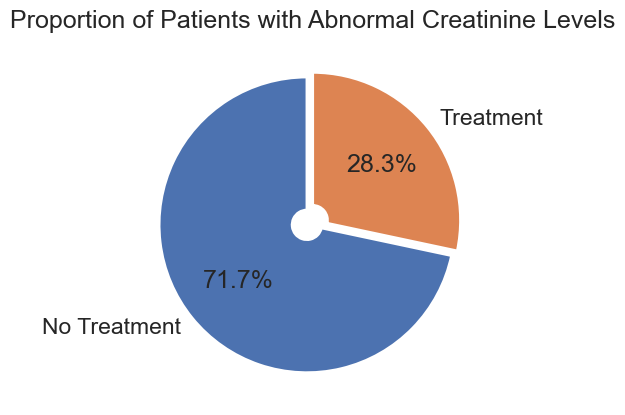

In [247]:
label = ["No Treatment","Treatment"]
value = s_t.value_counts().values
explode = [0.05,0]
wedgeprops = {'width':0.9, 'edgecolor':'w', 'linewidth':2}
plt.pie(value, labels=label, autopct='%.1f%%', startangle = 90, counterclock=True, explode=explode, wedgeprops=wedgeprops)
plt.title("Proportion of Patients with Abnormal Creatinine Levels")
plt.show()

In [251]:
# 치료 여부에 따른 사망자 수
d_t = dm_serum_df.loc[:,["Deaths"]]
d_t.value_counts()

Deaths
1         202
0          38
Name: count, dtype: int64

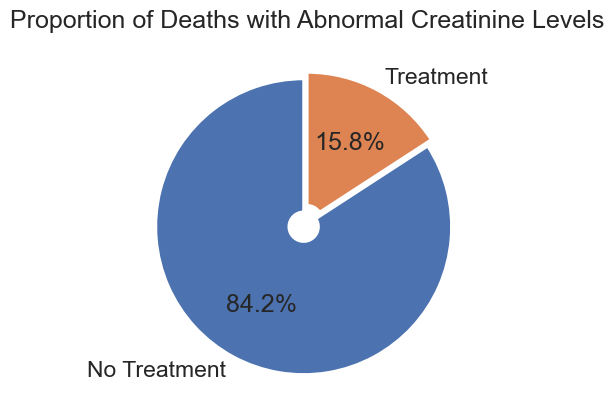

In [253]:
label = ["No Treatment","Treatment"]
value = d_t.value_counts().values
explode = [0.05,0]
wedgeprops = {'width':0.9, 'edgecolor':'w', 'linewidth':2}
plt.pie(value, labels=label, autopct='%.1f%%', startangle = 90, counterclock=True, explode=explode, wedgeprops=wedgeprops)
plt.title("Proportion of Deaths with Abnormal Creatinine Levels")
plt.show()

### 지역별 환자 분포

In [183]:
# 지역별 환자 수
dm_df["City"].value_counts()

City
Bengaluru    56
Kolkata      47
Ahmedabad    45
Mumbai       42
Delhi        37
Pune         36
Chennai      34
Hyderabad    30
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_1732\132096800.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette="rocket", legend=False)


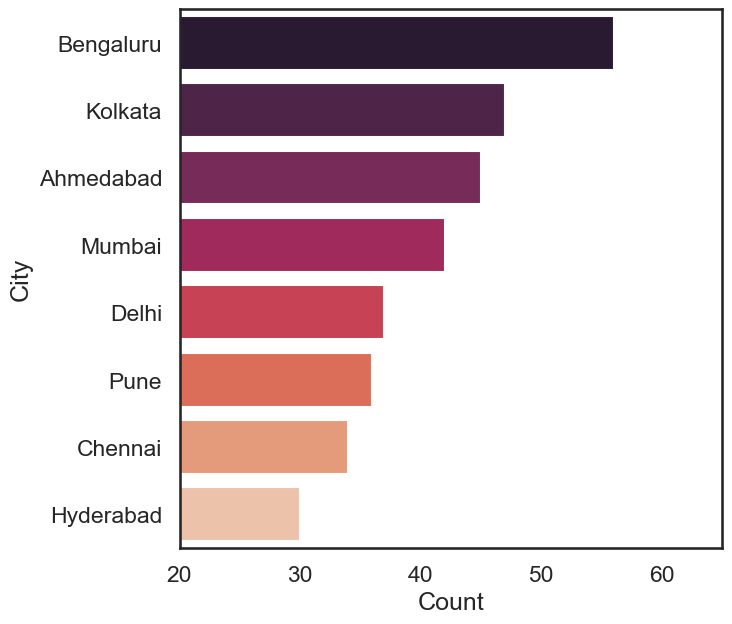

In [189]:
sns.set_theme(style="white", context = "talk")

plt.figure(figsize=(7,7))

x = dm_df["City"].value_counts().values
y = dm_df["City"].value_counts().index
sns.barplot(x=x, y=y, palette="rocket", legend=False)
plt.xlabel("Count")
plt.ylabel("City")
plt.xlim(20,65)
plt.show()

In [200]:
# 당뇨 환자들 중 평균 입원일보다 많이 입원한 환자들의 지역별 사망자 수
dm_df[dm_df["Days_In_Hospital"]>dm_df["Days_In_Hospital"].mean()].groupby("City").size()

City
Ahmedabad    15
Bengaluru    30
Chennai      17
Delhi        23
Hyderabad    16
Kolkata      24
Mumbai       23
Pune         18
dtype: int64

In [201]:
city_dm_death = dm_df[dm_df["Days_In_Hospital"]>dm_df["Days_In_Hospital"].mean()].groupby("City").size()

City
Ahmedabad    15
Bengaluru    30
Chennai      17
Delhi        23
Hyderabad    16
Kolkata      24
Mumbai       23
Pune         18
dtype: int64

In [203]:
city_dm_death.index
city_dm_death.values

array([15, 30, 17, 23, 16, 24, 23, 18], dtype=int64)

C:\Users\user\AppData\Local\Temp\ipykernel_1732\1980062848.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette="rocket", legend=False)


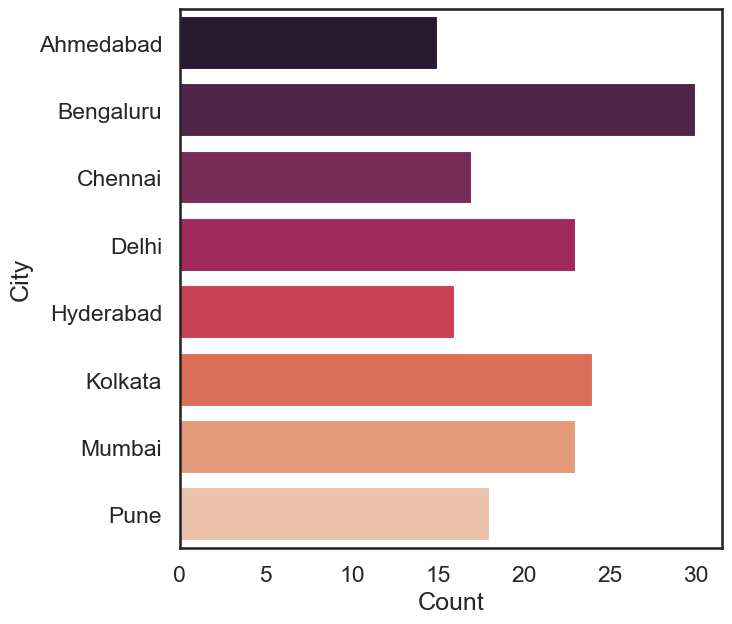

In [205]:
sns.set_theme(style="white", context = "talk")

plt.figure(figsize=(7,7))

x = city_dm_death.values
y = city_dm_death.index
sns.barplot(x=x, y=y, palette="rocket", legend=False)
plt.xlabel("Count")
plt.ylabel("City")
plt.show()